__Exploring Starbucks Menu Nutrition Facts__

Starbucks brand is sometimes associated with being high in calories and sugar, but is this perception a valid one?  Lets explore the menu items to see their distributions and relationships.

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv',encoding='ISO-8859-1')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


This is a very clean dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

__Lets explore starting with total calories across the menu.__

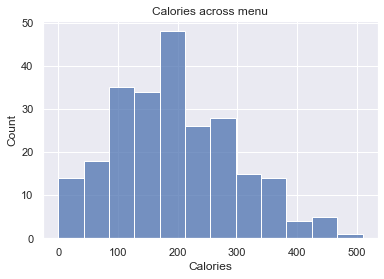

In [5]:
plt.title('Calories across menu')
_ = sns.histplot(df.Calories,)


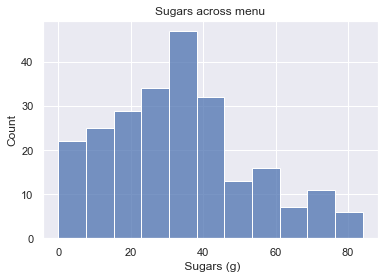

In [6]:
plt.title('Sugars across menu')
_ = sns.histplot(df[" Sugars (g)"])

Right away we see that the majority of drinks are between 100 and 300 calories. Sugar grams look mostly in the 30s range both distributions show some normality

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Beverage_category,242,9,Classic Espresso Drinks,58
Beverage,242,33,TazoÂ® Full-Leaf Red Tea Latte (Vanilla Rooibos),12
Beverage_prep,242,13,Soymilk,66
Total Fat (g),242,24,0.1,34
Vitamin A (% DV),242,11,10%,43
Vitamin C (% DV),242,10,0%,188
Calcium (% DV),242,14,10%,51
Iron (% DV),242,18,0%,99
Caffeine (mg),241,36,75,37


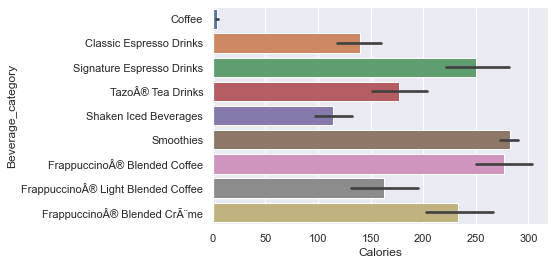

In [9]:
_ = sns.barplot(data = df, x='Calories',y="Beverage_category")

Here we can see that several drink categories can be high calories but have a big range due to the sizing and customization options available. 
According to our stats, the most common drink offering is from the Classic Espresso category, which is the 2nd lowest in overall calorie distributions.  This might suggest most patrons are ordering regular coffee drinks not the sugary ones but we would need incorporate sales data to get a better idea.

We can also see that the average sugar value in the menu is about 33 grams.  This is about equal to a can of soda or a juice drink.  However these averages can be deceiving as the standard deviation is almost 19 grams.  This again points to the highly customizable nature of the drink offerings.  If a customer orders whole milk vs almond milk, the sugars and calories will be very different.  

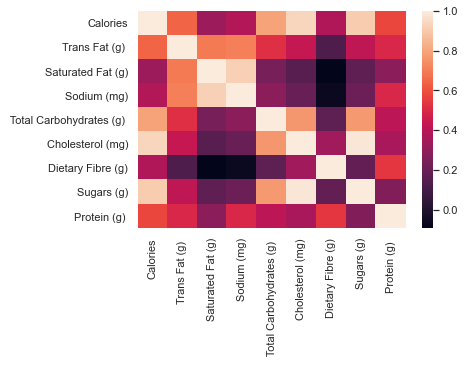

In [10]:
_ = sns.heatmap(df.corr())

Looking at our heatmap, calories is closely correlated with sugar. This matches up with our earlier histogram distributions of Calories and Sugars. 

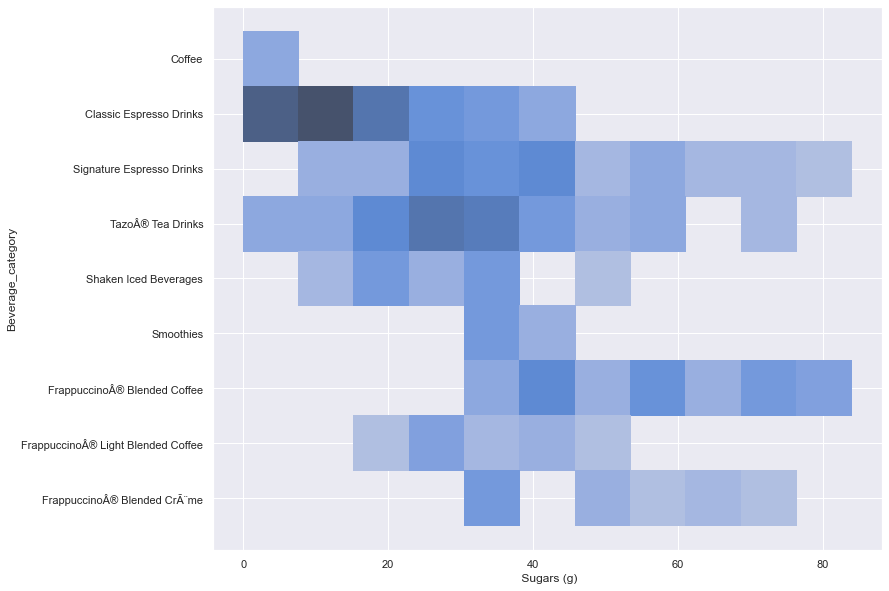

In [11]:
plt.subplots(figsize=(12,10))
_ = sns.histplot(data=df, x=' Sugars (g)',y="Beverage_category",)

Looking at beverage categories we can see that signature espresso drinks can have a wide range depending on the order customization.  Given Americans propensity for sweetness it makes sense that the offerings averaging on the sweet side. the 33 gram sugar average is still below a can of soda. 

The perception that drinks at starbucks are high calorie and sugary is more a reflection on the consumer base than anything.  Starbucks is offerings customers a wide range of sweetening options trying to meet their demand.  This data can point out how starbucks views trends and positions itself towards the consumer.  

It would be interesting to investigate further to see how the sales data and trends vary based on different regions.